In [1]:
import pandas as pd
import zipfile

In [12]:
credits_df = pd.read_csv(r"C:\Users\pooja\Downloads\tmdb_5000_credits.csv\tmdb_5000_credits.csv")

In [13]:
print(credits_df.head())

   movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4  [{"credit_id": "52fe479ac3a36847f813eaa3",

In [14]:
print(credits_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB
None


In [15]:
print(credits_df.describe())

            movie_id
count    4803.000000
mean    57165.484281
std     88694.614033
min         5.000000
25%      9014.500000
50%     14629.000000
75%     58610.500000
max    459488.000000


In [16]:
import ast

In [17]:
def extract_actors(cast_str):
    cast_list = ast.literal_eval(cast_str)
    actors = [cast['name'] for cast in cast_list[:3]]
    return actors

In [18]:
def extract_director(crew_str):
    crew_list = ast.literal_eval(crew_str)
    for crew in crew_list:
        if crew['job'] == 'Director':
            return crew['name']
    return None

In [19]:
credits_df['actors'] = credits_df['cast'].apply(extract_actors)
credits_df['director'] = credits_df['crew'].apply(extract_director)

In [20]:
credits_df.drop(columns=['cast', 'crew'], inplace=True)

In [21]:
print(credits_df.head())

   movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                             actors           director  
0  [Sam Worthington, Zoe Saldana, Sigourney Weaver]      James Cameron  
1     [Johnny Depp, Orlando Bloom, Keira Knightley]     Gore Verbinski  
2      [Daniel Craig, Christoph Waltz, Léa Seydoux]         Sam Mendes  
3      [Christian Bale, Michael Caine, Gary Oldman]  Christopher Nolan  
4    [Taylor Kitsch, Lynn Collins, Samantha Morton]     Andrew Stanton  


In [22]:
from collections import Counter

In [23]:
actor_counter = Counter([actor for actors in credits_df['actors'] for actor in actors])
credits_df['actor_popularity'] = credits_df['actors'].apply(lambda x: sum(actor_counter[actor] for actor in x))

In [24]:
director_counter = Counter(credits_df['director'])
credits_df['director_popularity'] = credits_df['director'].apply(lambda x: director_counter[x])

In [25]:
print(credits_df.head())

   movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                             actors           director  \
0  [Sam Worthington, Zoe Saldana, Sigourney Weaver]      James Cameron   
1     [Johnny Depp, Orlando Bloom, Keira Knightley]     Gore Verbinski   
2      [Daniel Craig, Christoph Waltz, Léa Seydoux]         Sam Mendes   
3      [Christian Bale, Michael Caine, Gary Oldman]  Christopher Nolan   
4    [Taylor Kitsch, Lynn Collins, Samantha Morton]     Andrew Stanton   

   actor_popularity  director_popularity  
0                36                    7  
1                56                    7  
2                21                    7  
3                57                    8

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = credits_df[['actor_popularity', 'director_popularity']]
y = credits_df['movie_id'] 

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
print(X_train.shape, X_test.shape)

(3842, 2) (961, 2)


In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
model = LinearRegression()

In [32]:
model.fit(X_train, y_train)

LinearRegression()

In [33]:
y_pred = model.predict(X_test)

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [35]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [36]:
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 60586.07053906774
Root Mean Squared Error (RMSE): 87078.80061659722


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
sns.set(style="whitegrid")

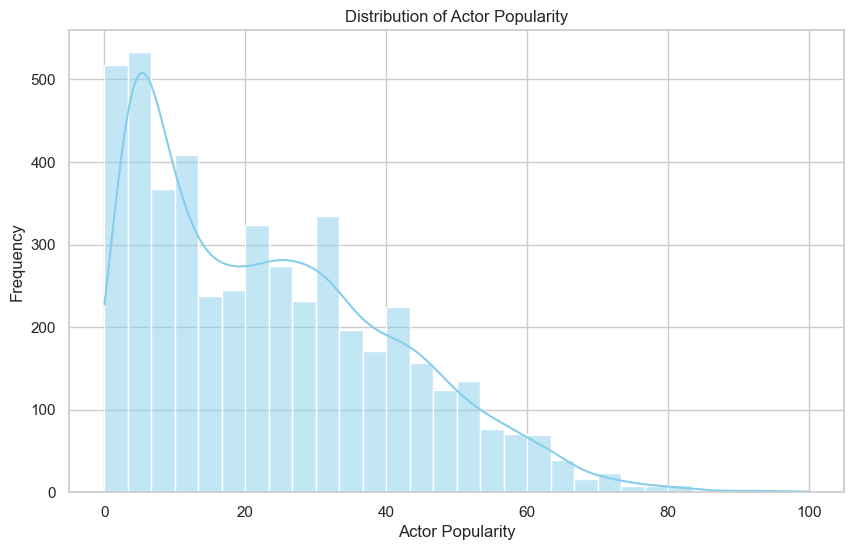

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(credits_df['actor_popularity'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Actor Popularity')
plt.xlabel('Actor Popularity')
plt.ylabel('Frequency')
plt.show()

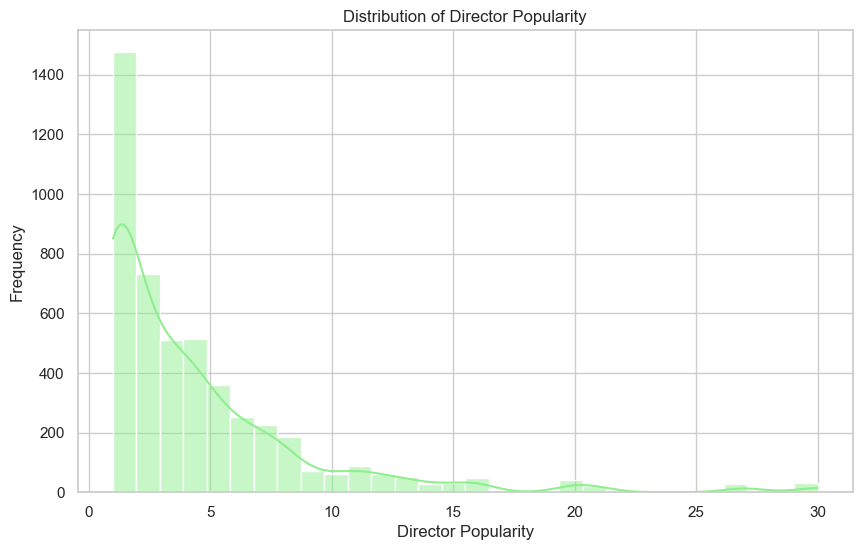

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(credits_df['director_popularity'], bins=30, kde=True, color='lightgreen')
plt.title('Distribution of Director Popularity')
plt.xlabel('Director Popularity')
plt.ylabel('Frequency')
plt.show()

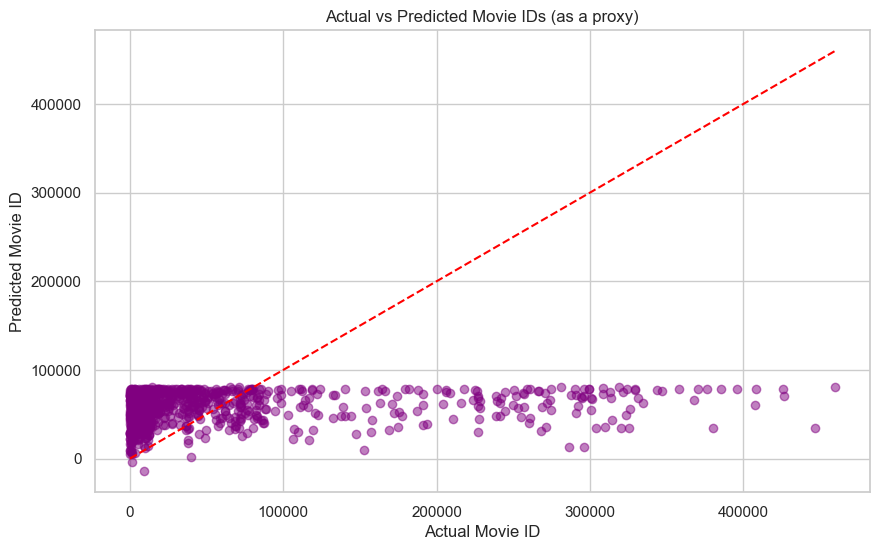

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='purple')
plt.title('Actual vs Predicted Movie IDs (as a proxy)')
plt.xlabel('Actual Movie ID')
plt.ylabel('Predicted Movie ID')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

In [42]:
residuals = y_test - y_pred

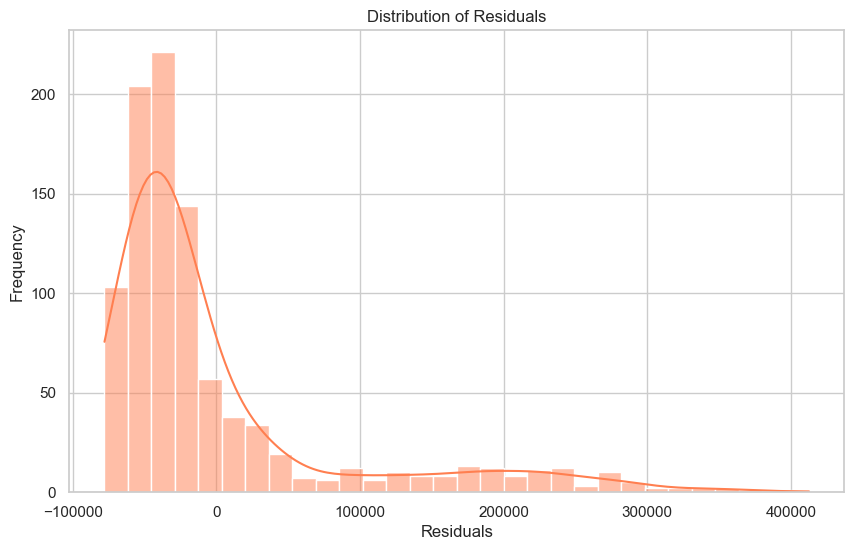

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True, color='coral')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()